# Polynomial Regression

In [25]:
########PROBLEMAS NO LINEALES 
#la regresión polinomial se puede expresar como una combinación lineal de los coeficientes o un caso especial de la regresión lineal múltiple
#en este caso es útil emplear regresión polinómica porque se trata de un problema no lineal (datos no distribuidos) y la regresión lineal no funciona
#aunque se puede ver que los datos tienen diferentes escalas o rangos de valores, en la regresión polinomial no se hace feature scaling

## Importing the libraries

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [27]:
dataset = pd.read_csv('Position_Salaries.csv')
dataset.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [28]:
X = dataset.iloc[:, 1:-1].values #no se toma en cuenta la columna position
y = dataset.iloc[:, -1].values

## Splitting the dataset into the Training set and Test set

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

## Training the Linear Regression model 

In [30]:
#1º versión: regresión lineal
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred = lin_reg.predict(X_test)

## Training the Polynomial Regression model on the whole dataset

In [31]:
#2º versión: regresión polinomial: se calcula la regresión lineal del polinomio
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree = 4) #grado del polinomio, se va probando el mejor valor o se aplica RMSE al modelo

lin_reg_2 = LinearRegression() #se declara un segundo lin_reg porque en este caso se va a aplicar fit con la X del polinomio
lin_reg_2.fit(poly.fit_transform(X_train), y_train) 
y_pred2 = lin_reg_2.predict(poly.fit_transform(X))

## Visualising the Linear Regression results

In [32]:
# plt.scatter(X, y, color = 'red')
# plt.plot(X, y_pred, color = 'blue')
# plt.title('Truth or Bluff (Linear Regression)')
# plt.xlabel('Position Level')
# plt.ylabel('Salary')
# plt.show()
# #como se puede ver no es indicado en este caso utilizar regresión lineal

## Visualising the Polynomial Regression results

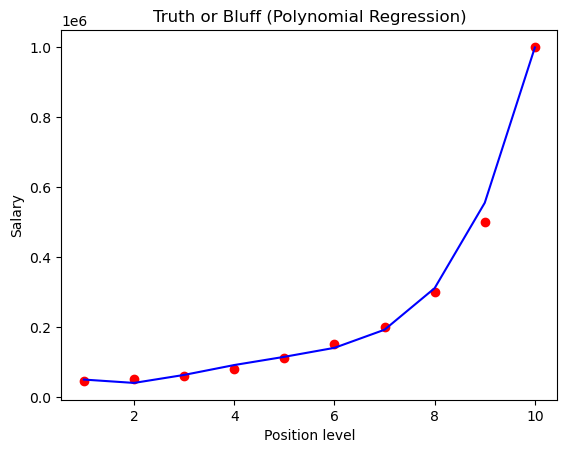

In [33]:
plt.scatter(X, y, color = 'red')
plt.plot(X, y_pred2, color = 'blue')
plt.title('Truth or Bluff (Polynomial Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

## Visualising the Polynomial Regression results (for higher resolution and smoother curve)

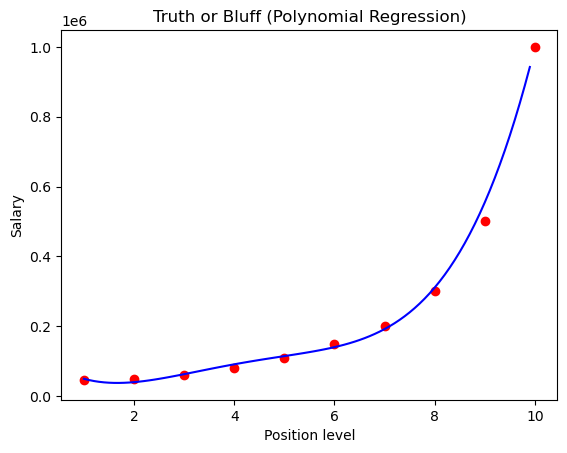

In [34]:
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, lin_reg_2.predict(poly.fit_transform(X_grid)), color = 'blue')
plt.title('Truth or Bluff (Polynomial Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

## Predicting a new result with Linear Regression

In [35]:
lin_reg.predict([[6.5]]) #level=6.5, doble corchete porque el input tiene que ser un array 2D

array([335474.55968689])

## Predicting a new result with Polynomial Regression

In [36]:
lin_reg_2.predict(poly.fit_transform([[6.5]])) #igual que arriba

array([160454.59685742])

## Getting the polynomial regression equation (coefficients values)

## Evaluating the Model Performance

In [37]:
print(lin_reg_2.coef_)
print(lin_reg_2.intercept_) 

[      0.         -143427.12888401   68157.93948413  -11608.84599445
     709.02332493]
135486.37366812886


## Evaluating the Model Performance

In [38]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred) #se debería hacer sobre un mismo dataset para todos los casos

0.9779215014976274